# Renewal Processes

A renewal process is a type of a stochastic or a random process. 

### Definition: Stochastic Process
Assume $(\Omega, \mathcal{F}, \mathbb{P})$, where $\Omega$ - a sample space, $ \mathcal{F}$ - a $\sigma$-algebra and $\mathbb{P}$ - a probability measure.

Then $X(t, \Omega) \rightarrow \mathbb{R}$ is a **random process** if $X(t, \cdot)$ is a random variable for each $t$.
### Definition: Renewal Process
$S_n$ is a **renewal process** if $S_0 = 0$ and $S_n = S_{n-1} + \xi_n$, where $\xi_1, \xi_2 \cdots$ are IID random variables with $\mathbb{P}(\xi_i >0) = 1$ for each $i$.
### Definition: Counting Process
A **counting process** $N_t$ of a renewal process $S_t$ is defined such that $N_t = max_{k}(S_k \leq t).$

*Example: A counting process is the number of customers in the store, the renewal process marks the times they enter into the store. The random variable $\xi_i$ of the renewal process is the time between the $i$-1-th customer and the $i$-th customer.*

*Example: Number of stock jumps, there $\xi_i$ is the time between the $i$-1-th and the $i$-th jump.*


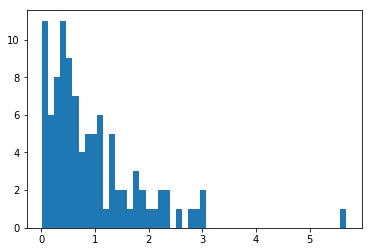

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from scipy import stats
import math as math
import time

t0 = time.time()

%matplotlib inline

N = 100
M = 10000
UNIT = 0.1

#Let's create a distribution of the times between the customers
def generate():
    if True:
        p_x = [rd.expovariate(1) for i in range(N)]
        return p_x
    if False:
        p_x = [rd.expovariate(1)*0.5 + 0.5 *rd.expovariate(2)  for i in range(N)]
        return p_x
plt.hist(generate(), bins=50);
#Histogram of the dist used

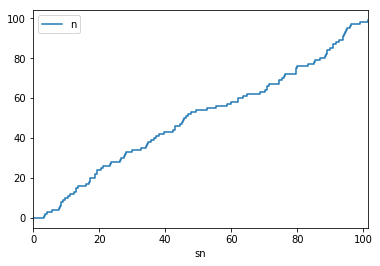

In [37]:
#Let's plot the counting process, based on the distribution above.
p_x = generate()
df = pd.DataFrame(p_x, columns = ["xi"])
df["sn"] = df.xi.cumsum()
df["n"] = [i for i in range(N)]
df.loc[0] = [0,0,0]
df.head()
df.plot(drawstyle="steps-post", x = "sn", y = "n")
#x axis is the time, everytime s_i increases to s_i+1, n (on y axis) increases by 1

In [ ]:
#add more generated counting processes
ct = pd.DataFrame()
ct["n"] = [i for i in range(N)]
for i in range(M):
    x = "x" + str(i)
    sn = "s" + str(i)
    df[x] = generate()
    ct[sn] = df[x].cumsum()
ct.plot(drawstyle="steps-post", x = "n", legend = False)

In [ ]:
def exp_n(t):
    replace = ct["n"]
    ct.drop(columns="n")    
    ar = np.array(ct.values.tolist())
    sm = np.where(ar <= t, 1, 0).tolist()
    ct["n"] = replace
    return np.sum(sm)/M

#expected value of n at time t using MC
exp = pd.DataFrame()
exp["t"] = np.arange(1, 0.5*ct.max().max(),1)
exp["val"+str(M)] = [exp_n(t) for t in exp["t"]]
exp.plot(x = "t", y = ["val"+str(M)]).set_aspect('equal', adjustable='box')



### How to calculate the expected value of the counting process analitically?
Above, we calcualted the expected value using Monte Carlo simulations. 
Now, let's compute it!

The computation involves 3 steps and some Laplace transforms [(What this?)](https://en.wikipedia.org/wiki/Laplace_transform).

1. Compute the Laplace transform $\mathcal{L}_p(s)$ of $p_{\xi_i}(x)$.

2. Transform the Laplace transform of $p_{\xi_i}(x)$ to  $\mathcal{L}_{U}(s) = \frac{\mathcal{L}_{U}(s)}{s(1-\mathcal{L}_{U}(s))}$.
3. Find the function $U(t)$ from the $\mathcal{L}_{U}(s)$. (*The most difficult!*)

*Example:*
Let $S_n = S_{n-1} + \xi_n$ be a renewal process with $\xi_1, \xi_2, \dots$ IID random variables with an exponential distribution: $p_{\xi_i}(x) = \lambda e^{- \lambda x}$. What is the expected value of the $N_t$ counting process of the renewal process $S_n$?

1. $\mathcal{L}_p(s) = \int_0^\infty \lambda e^{- \lambda x} e^{-s x} dx = \lambda \int_0^\infty e^{- (\lambda +s)x} dx  = \frac{- \lambda}{\lambda + s} e^{- (\lambda +s)x} \Big|_0^\infty = \frac{\lambda}{\lambda +s}$

2. $\mathcal{L}_{U}(s) = \frac{\mathcal{L}_{U}(s)}{s(1-\mathcal{L}_{U}(s))} = \frac{\frac{\lambda}{\lambda +s}}{s(1-\frac{\lambda}{\lambda +s})} = \frac{\lambda}{s^2}$

3. $\mathcal{L}_{U}(s) \rightarrow U(t) = \lambda t.$ 

In [ ]:
#example lambda = 1
def u(t, l = 1):
    return l * t
exp["u"] = [u(t) for t in exp["t"]]
exp["diff"] = exp["val"+str(M)] - exp["u"]

t1 = time.time()
total = t1-t0

In [ ]:
#Observe the error of the MC method
#plot both expected value using MC and the precise calculation
exp.plot(x = "t", y = ["val"+str(M), "u"]).set_aspect('equal', adjustable='box')
#plot the difference between the MC and precise calculation
exp.plot(x = "t", y = "diff")

In [35]:
total

261.3866231441498